In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [2]:
df_schuepp = pd.read_csv('cherry_schuepp.csv')

In [3]:
df_schuepp = df_schuepp.rename(columns={'yield': 'fruit_set'})

In [4]:
# Select only the numerical columns for correlation
numerical_df_schuepp = df_schuepp.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
corr = numerical_df_schuepp.corr()

# Extract the correlations of 'fruit_set' with other columns
schuepp_yield_corr = corr['fruit_set']

# Display the correlations
print('Fruit Set')
print(schuepp_yield_corr)



Fruit Set
Unnamed: 0                 -0.010607
site_id                    -0.006776
field_size                       NaN
fruit_set                   1.000000
abundance                   0.318112
ab_honeybee                -0.064488
ab_bombus                        NaN
ab_wildbees                 0.263791
ab_syrphids                 0.361899
ab_humbleflies                   NaN
ab_other_flies              0.240063
ab_beetles                  0.155813
ab_lepidoptera                   NaN
ab_nonbee_hymenoptera       0.077388
ab_others                   0.093433
visitation_rate             0.283339
visit_honeybee             -0.064488
visit_bombus                     NaN
visit_wildbees              0.129484
visit_syrphids              0.361899
visit_humbleflies                NaN
visit_other_flies           0.233509
visit_beetles               0.139556
visit_lepidoptera                NaN
visit_nonbee_hymenoptera    0.113178
visit_others                0.093433
Name: fruit_set, dtype: floa

Linear regression: Predicting fruit set based on several features individually

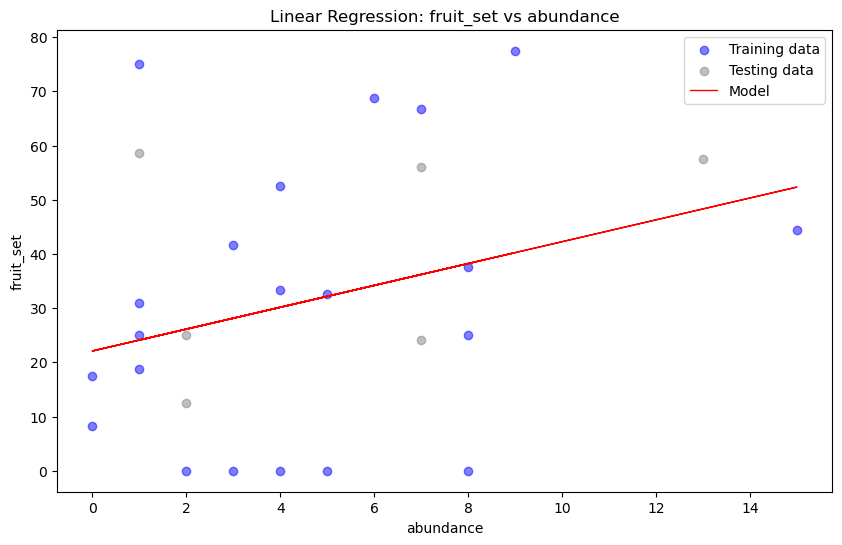

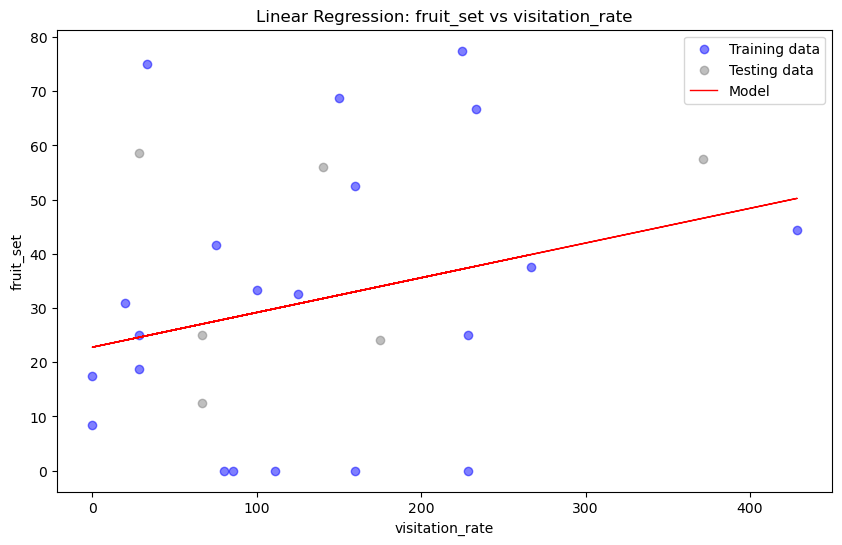

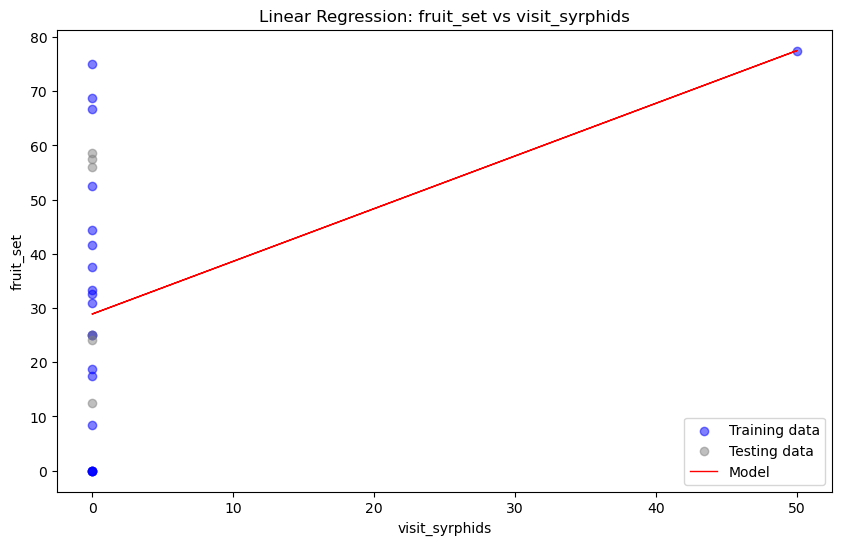

,Feature,Coefficient,Intercept,MAE,MSE,RMSE,R2
0,abundance,2.016,22.09,15.06,333.85,18.27,0.06
1,visitation_rate,0.064,22.77,15.95,363.65,19.07,-0.02
2,visit_syrphids,0.972,28.90,18.43,457.79,21.40,-0.28


In [5]:
def test_features(df, features, target):
    """
    Test multiple features for linear regression models, visualize the regression for each feature
    with both training and testing data.
    
    Parameters:
    - df: DataFrame containing the dataset.
    - features: List of feature names to test.
    - target: Name of the target variable.
    
    Returns:
    - A DataFrame with the results of the analysis for each feature.
    """
    # Initialize an empty list to store results
    results = []
    
    for feature in features:
        # Prepare the data
        X = df[[feature]]  # Feature matrix
        y = df[target]  # Target variable
        
        # Split the data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
        
        # Create and train the linear regression model
        model = LinearRegression()
        model.fit(X_train, y_train)
        
        # Predict target values for both training and testing set
        y_pred_train = model.predict(X_train)
        y_pred_test = model.predict(X_test)
        
        # Calculate evaluation metrics using test set
        mae = round(mean_absolute_error(y_test, y_pred_test), 2)
        mse = round(mean_squared_error(y_test, y_pred_test), 2)
        rmse = round(mean_squared_error(y_test, y_pred_test, squared=False), 2)
        R2 = round(r2_score(y_test, y_pred_test), 2)
        
        # Append the results
        results.append({
            'Feature': feature,
            'Coefficient': round(model.coef_[0], 3),
            'Intercept': round(model.intercept_, 2),
            'MAE': mae,
            'MSE': mse,
            'RMSE': rmse,
            'R2': R2
        })
        
        # Visualization
        plt.figure(figsize=(10, 6))
        plt.scatter(X_train, y_train, color='blue', alpha=0.5, label='Training data')
        plt.scatter(X_test, y_test, color='gray', alpha=0.5, label='Testing data')
        plt.plot(X_train, y_pred_train, 'r-', linewidth=1, label='Model')
        plt.title(f'Linear Regression: {target} vs {feature}')
        plt.xlabel(feature)
        plt.ylabel(target)
        plt.legend()
        plt.show()
    
    # Convert results to a DataFrame
    results_df = pd.DataFrame(results)
    return results_df

# Example usage
features_to_test = ['abundance', 'visitation_rate', 'visit_syrphids']
target_column = 'fruit_set'
results_df = test_features(df_schuepp, features_to_test, target_column)

display(results_df)


Multiple linear regression

In [6]:
# Prepare the data
features = ['abundance','visitation_rate']
X = df_schuepp[features]  # Feature matrix
y = df_schuepp['fruit_set']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Predict 'yield2' values for the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mae = round(mean_absolute_error(y_test, y_pred),2)
mse = round(mean_squared_error(y_test, y_pred),2)
rmse = round(mean_squared_error(y_test, y_pred, squared=False),2)
R2 = round(r2_score(y_test, y_pred),2)

# Print the model coefficients and evaluation metrics
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared score:", R2)


Coefficients: [ 1.50359668 -0.01705281]
Intercept: 27.44395143166342
Mean Absolute Error: 20.87
Mean Squared Error: 537.42
Root Mean Squared Error: 23.18
R-squared score: 0.22


Random Forest

In [7]:
# Define your features and target variable
features = ['abundance', 'visitation_rate']
X = df_schuepp[features]
y = df_schuepp['fruit_set']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on the testing set
y_pred = rf_model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")

Mean Absolute Error (MAE): 20.99157493318381
Mean Squared Error (MSE): 571.3445334806846
Root Mean Squared Error (RMSE): 23.902814342262808
R-squared (R2): 0.1679649127457391


Cross-validation on multiple linear

In [8]:
# Prepare the data
features = ['abundance','visitation_rate']
X = df_schuepp[features]  # Feature matrix
y = df_schuepp['fruit_set']  # Target variable

# Initialize the linear regression model
model = LinearRegression()

# Define the K-Fold cross-validation method
kf = KFold(n_splits=5, shuffle=True, random_state=2)  # 5 folds

# Calculate cross-validated MAE scores and convert to positive (as scores are negative)
mae_scores = -cross_val_score(model, X, y, cv=kf, scoring='neg_mean_absolute_error')
# Calculate cross-validated MSE scores and convert to positive
mse_scores = -cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error')
# Calculate cross-validated R^2 scores
r2_scores = cross_val_score(model, X, y, cv=kf, scoring='r2')

# Print the average scores
print(f"Average MAE across all folds: {round(np.mean(mae_scores),2)}")
print(f"Average MSE across all folds: {round(np.mean(mse_scores),2)}")
print(f"Average RMSE across all folds: {round(np.mean(np.sqrt(mse_scores)),2)}")  # RMSE is the square root of MSE
print(f"Average R-squared across all folds: {round(np.mean(r2_scores),2)}") 



Average MAE across all folds: 21.68
Average MSE across all folds: 700.99
Average RMSE across all folds: 26.08
Average R-squared across all folds: -0.79
